# ✈️ Dynamic Airfare Insights

This notebook provides insights for flight fare patterns across Indian cities using a Python-cleaned dataset. We analyze airline frequencies, time-based pricing, city-wise trends, and booking behavior.

## Data Source
This project uses the [Airlines Flights Data](https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data) from Kaggle.


---
**This project answers the questions:**
- **Airline Frequencies**: Which airlines appear most often?
- **Departure & Arrival Times**: Bar charts to reveal peak travel hours.
- **Source & Destination Cities**: Visualize popular routes.
- **Airline vs. Price**: Do different carriers charge differently?
- **Time of Day Impact**: Does timing affect ticket cost?
- **Route-Based Pricing**: How do source/destination affect price?
- **Last-Minute Bookings**: Price changes when booking 1–2 days before departure.
- **Class Comparison**: Economy vs. Business pricing.
- **Vistara Business Class**: Average price from Delhi to Hyderabad.
---
## NOTES!
1. This notebook uses pandas version 2.3.1. A FutureWarning may appear regarding downcasting behavior in .replace(), but it does not affect the output. Code has been updated to reflect future compatibility.
2. This notebook uses Matplotlib 3.8. A minor deprecation warning may appear regarding parameter naming, but it does not affect output.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))
df = pd.read_csv('Airlines Flights Data.csv')
print(df)


Saving Airlines Flights Data.csv to Airlines Flights Data (1).csv
         index   airline   flight source_city departure_time stops  \
0            0  SpiceJet  SG-8709       Delhi        Evening  zero   
1            1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3   Vistara   UK-995       Delhi        Morning  zero   
4            4   Vistara   UK-963       Delhi        Morning  zero   
...        ...       ...      ...         ...            ...   ...   
300148  300148   Vistara   UK-822     Chennai        Morning   one   
300149  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0             

In [ ]:
# Data Cleaning and Processing
df.columns = [col.strip().replace(' ', '_').title() for col in df.columns]
df.drop(columns=['Index'], inplace=True)
df['Stops'] = df['Stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Days_Left'] = pd.to_numeric(df['Days_Left'], errors='coerce')
df['Duration'] = df['Duration'].astype(float)
df['Duration_Minutes'] = (df['Duration'] * 60).round().astype(int)

categorical_cols = ['Airline', 'Source_City', 'Destination_City', 'Departure_Time', 'Arrival_Time', 'Class']
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()


/tmp/ipython-input-3268885917.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stops'] = df['Stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)


#📊 Exploratory Data Analysis
We begin by visualizing airline frequencies, departure/arrival times, and city distributions.


Airline Frequencies:
 Airline
Vistara      127859
Air_India     80892
Indigo        43120
Go_First      23173
Airasia       16098
Spicejet       9011
Name: count, dtype: int64


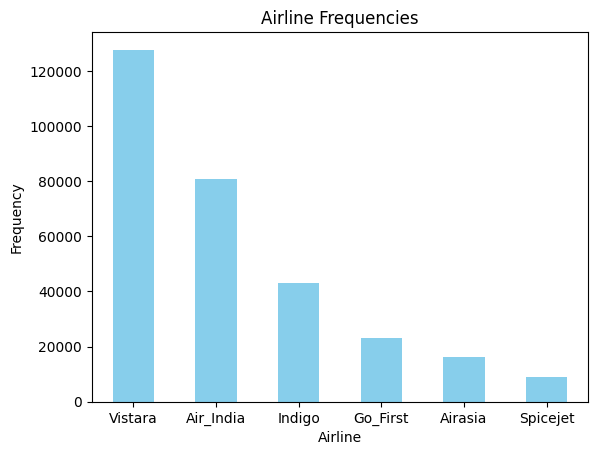

In [ ]:
# Airlines and Their Frequencies
airline_counts = df['Airline'].value_counts()
print("Airline Frequencies:\n", airline_counts)
airline_counts.plot(kind='bar', title='Airline Frequencies', color='skyblue')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


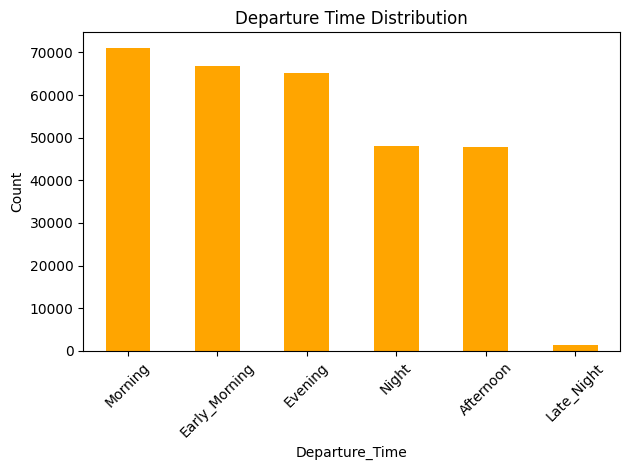

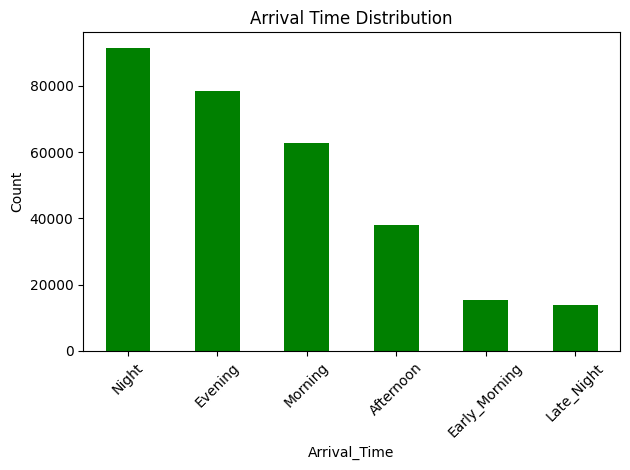

In [ ]:
# Departure & Arrival Time Bar Graphs
df['Departure_Time'].value_counts().plot(kind='bar', title='Departure Time Distribution', color='orange')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Arrival_Time'].value_counts().plot(kind='bar', title='Arrival Time Distribution', color='green')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

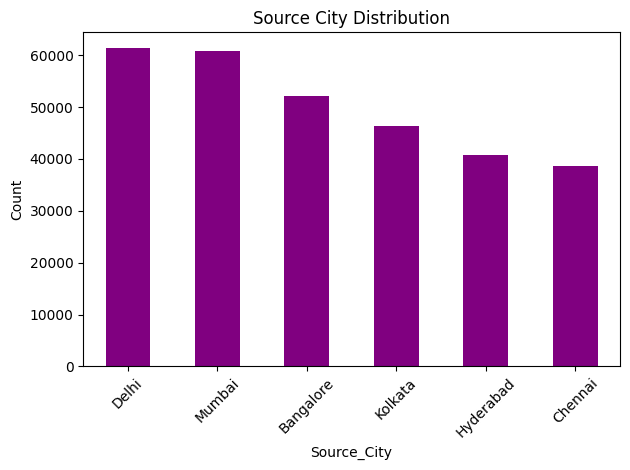

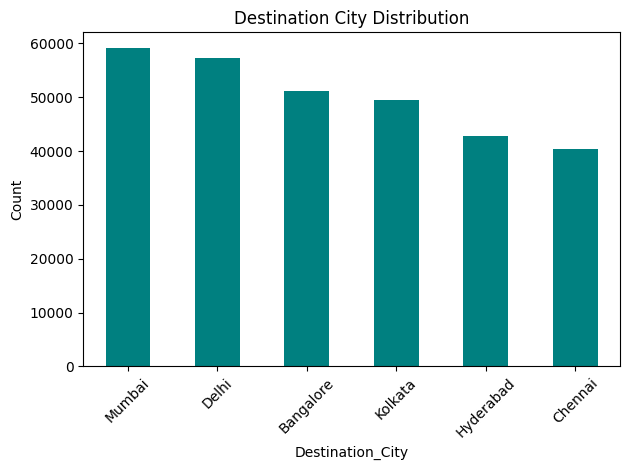

In [ ]:
#  Q3: Source & Destination City Bar Graphs
df['Source_City'].value_counts().plot(kind='bar', title='Source City Distribution', color='purple')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Destination_City'].value_counts().plot(kind='bar', title='Destination City Distribution', color='teal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 💸 Price Insights
We explore how flight prices vary across airlines, times, cities, booking windows, and travel classes.


/tmp/ipython-input-2885766410.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=airlines, patch_artist=True)


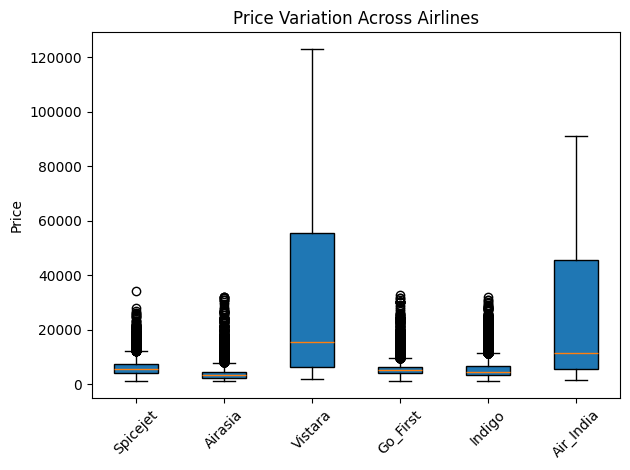

/tmp/ipython-input-2885766410.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=dep_times, patch_artist=True)


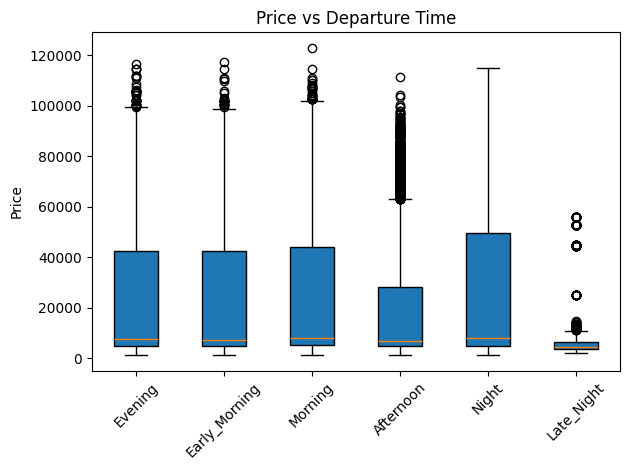

/tmp/ipython-input-2885766410.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=arr_times, patch_artist=True)


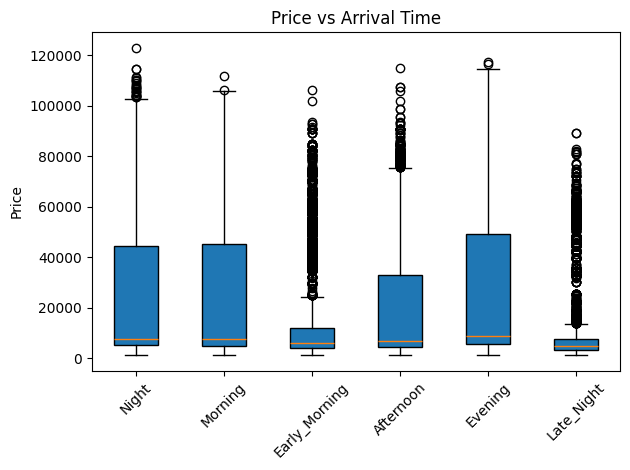

In [ ]:
# Price Variation by Airline
airlines = df['Airline'].unique()
data = [df[df['Airline'] == airline]['Price'] for airline in airlines]
plt.boxplot(data, labels=airlines, patch_artist=True)
plt.xticks(rotation=45)
plt.title('Price Variation Across Airlines')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Price vs Departure & Arrival Time
dep_times = df['Departure_Time'].unique()
data = [df[df['Departure_Time'] == time]['Price'] for time in dep_times]
plt.boxplot(data, labels=dep_times, patch_artist=True)
plt.xticks(rotation=45)
plt.title('Price vs Departure Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

arr_times = df['Arrival_Time'].unique()
data = [df[df['Arrival_Time'] == time]['Price'] for time in arr_times]
plt.boxplot(data, labels=arr_times, patch_artist=True)
plt.xticks(rotation=45)
plt.title('Price vs Arrival Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2338203341.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sources, patch_artist=True)


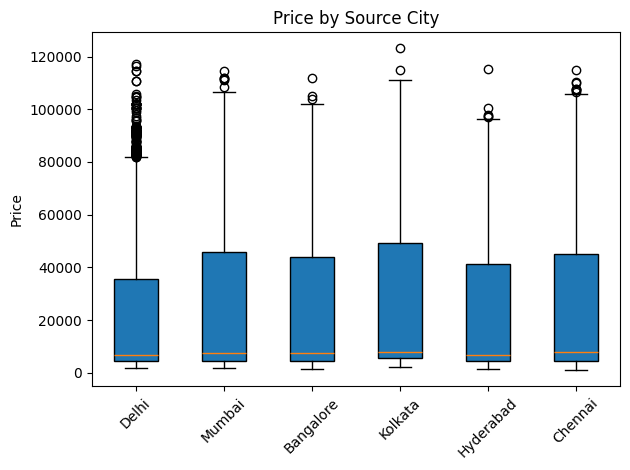

/tmp/ipython-input-2338203341.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=destinations, patch_artist=True)


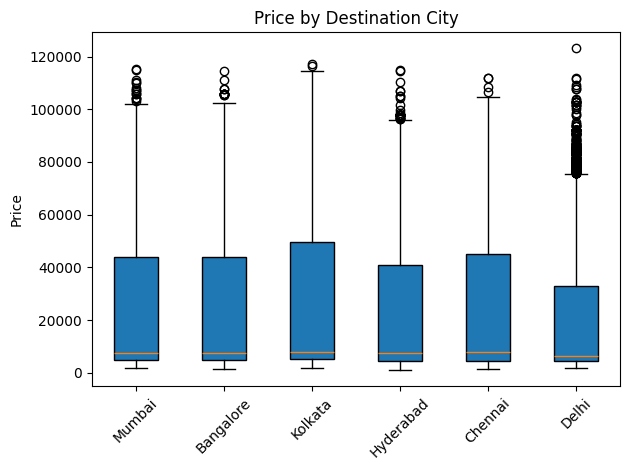

In [ ]:
# Price by Source & Destination
sources = df['Source_City'].unique()
data = [df[df['Source_City'] == city]['Price'] for city in sources]
plt.boxplot(data, labels=sources, patch_artist=True)
plt.xticks(rotation=45)
plt.title('Price by Source City')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

destinations = df['Destination_City'].unique()
data = [df[df['Destination_City'] == city]['Price'] for city in destinations]
plt.boxplot(data, labels=destinations, patch_artist=True)
plt.xticks(rotation=45)
plt.title('Price by Destination City')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Average Price (≤2 Days): 27421.169326390056
Average Price (>2 Days): 20757.498484024472


/tmp/ipython-input-3253909807.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['>2 Days', '≤2 Days'], patch_artist=True)


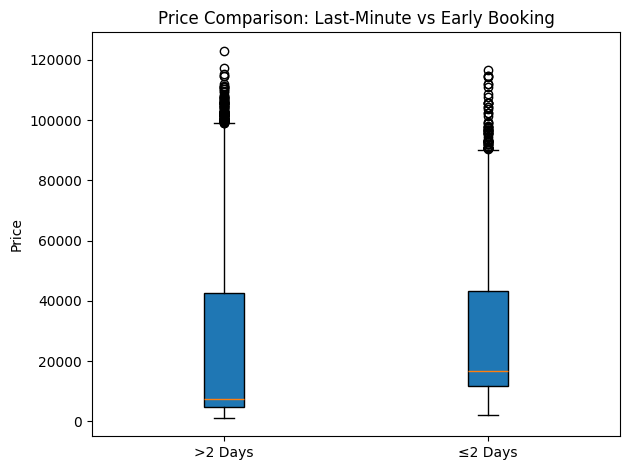

In [ ]:
# Last-Minute Booking Price Impact
last_minute = df[df['Days_Left'] <= 2]
non_last_minute = df[df['Days_Left'] > 2]
print("Average Price (≤2 Days):", last_minute['Price'].mean())
print("Average Price (>2 Days):", non_last_minute['Price'].mean())

data = [non_last_minute['Price'], last_minute['Price']]
plt.boxplot(data, labels=['>2 Days', '≤2 Days'], patch_artist=True)
plt.title('Price Comparison: Last-Minute vs Early Booking')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-716921116.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=classes, patch_artist=True)


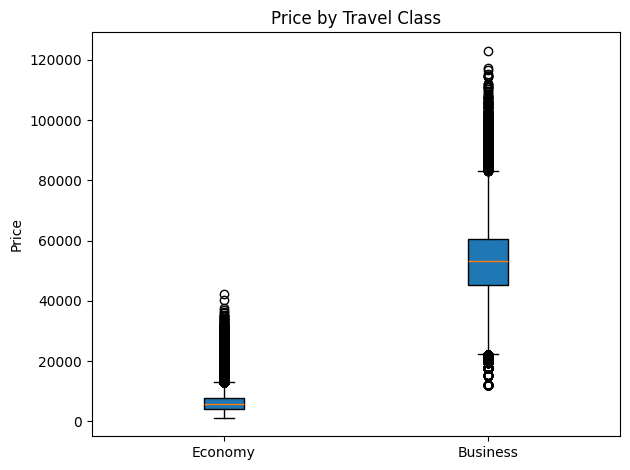

In [ ]:
# Price by Class
classes = df['Class'].unique()
data = [df[df['Class'] == cls]['Price'] for cls in classes]
plt.boxplot(data, labels=classes, patch_artist=True)
plt.title('Price by Travel Class')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 🎯 Targeted Insight
We calculate the average price for a specific route and class.


In [ ]:
# Average Price for Vistara (Delhi → Hyderabad, Business Class)
filtered = df[
    (df['Airline'] == 'Vistara') &
    (df['Source_City'] == 'Delhi') &
    (df['Destination_City'] == 'Hyderabad') &
    (df['Class'] == 'Business')
]
average_price = filtered['Price'].mean()
print("Average Price for Vistara (Delhi → Hyderabad, Business Class):", round(average_price, 2))

Average Price for Vistara (Delhi → Hyderabad, Business Class): 47939.84


In [ ]:
# Export Cleaned Data to have both CSV and Excel copies
df.to_csv('cleaned_airlines_flights_data.csv', index=False)
df.to_excel('cleaned_airlines_data.xlsx', index=False)


In [ ]:
# Final Data Preview
print(df)

         Airline   Flight Source_City Departure_Time  Stops   Arrival_Time  \
0       Spicejet  SG-8709       Delhi        Evening      0          Night   
1       Spicejet  SG-8157       Delhi  Early_Morning      0        Morning   
2        Airasia   I5-764       Delhi  Early_Morning      0  Early_Morning   
3        Vistara   UK-995       Delhi        Morning      0      Afternoon   
4        Vistara   UK-963       Delhi        Morning      0        Morning   
...          ...      ...         ...            ...    ...            ...   
300148   Vistara   UK-822     Chennai        Morning      1        Evening   
300149   Vistara   UK-826     Chennai      Afternoon      1          Night   
300150   Vistara   UK-832     Chennai  Early_Morning      1          Night   
300151   Vistara   UK-828     Chennai  Early_Morning      1        Evening   
300152   Vistara   UK-822     Chennai        Morning      1        Evening   

       Destination_City     Class  Duration  Days_Left  Price  